# Semester-Long Project 
# MTH 563
## Student D
### Task 5 Tutorial
Topic: Analysis on Data of Incidental data of Boston (AUGUST 2015 - TO DATE) 
source: https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system

Crime is a very serious problem in our daily life. Maybe you think it's far to you, but it always happen in our society. 
Crime incident reports are provided by Boston Police Department (BPD) to document the initial details surrounding an incident to which BPD officers respond. In this project, the dataset containing records from the new crime incident report system, which includes a reduced set of fields focused on capturing the type of incident as well as when and where it occurred. Records in the new system begin in June of 2015.

According to my project, I want to find the relationship of crime incidents to the date, time, and position in Boston. Which part is safer and which part is more dangerous in Boston.


In [4]:
import os
!pip install folium

# Import the data to sqlite3 database
## Define Basical Function for Database minipulation and clean the data
#### Used SQLite 3 to setup and manage the dataset. SQLite is a relational database management system. It easily to use and no need clients and servers. The searching speed is very high.

In [5]:
import sqlite3
from sqlite3 import Error

def create_connection(db_file, delete_db=False):
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn


def sql_execute(conn, create_table_sql):
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)

In [6]:
import pandas as pd
df = pd.read_csv('tmpkh5e5yc4_new.csv')
df

C:\Users\16429\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0,2,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,TESTTEST2,423,NaN,ASSAULT - AGGRAVATED,External,,0,2019-10-16 00:00:00,2019,10,Wednesday,0,NaN,RIVERVIEW DR,NaN,NaN,"(0.00000000, 0.00000000)"
1,S97333701,3301,NaN,VERBAL DISPUTE,C6,915,0,2020-07-18 14:34:00,2020,7,Saturday,14,NaN,MARY BOYLE WAY,42.330813,-71.051368,"(42.33081300, -71.05136800)"
2,S47513131,2647,NaN,THREATS TO DO BODILY HARM,E18,530,0,2020-06-24 10:15:00,2020,6,Wednesday,10,NaN,READVILLE ST,42.239491,-71.135954,"(42.23949100, -71.13595400)"
3,I92102201,3301,NaN,VERBAL DISPUTE,E13,583,0,2019-12-20 03:08:00,2019,12,Friday,3,NaN,DAY ST,42.325122,-71.107779,"(42.32512200, -71.10777900)"
4,I92097173,3115,NaN,INVESTIGATE PERSON,C11,355,0,2019-10-23 00:00:00,2019,10,Wednesday,0,NaN,GIBSON ST,42.297555,-71.059709,"(42.29755500, -71.05970900)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529755,20062356,1107,NaN,FRAUD - IMPERSONATION,E18,520,0,2020-08-28 18:39:00,2020,8,Friday,18,NaN,HYDE PARK AVE,42.256215,-71.124019,"(42.25621500, -71.12401900)"
529756,20054040,3501,NaN,MISSING PERSON,C11,,0,2020-07-30 15:30:00,2020,7,Thursday,15,NaN,GIBSON ST,42.297555,-71.059709,"(42.29755500, -71.05970900)"
529757,20046400,1501,NaN,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B2,330,0,2020-07-02 01:38:00,2020,7,Thursday,1,NaN,PASADENA RD,42.305760,-71.083771,"(42.30576000, -71.08377100)"
529758,20038446,1501,NaN,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B2,300,0,2020-06-03 01:15:00,2020,6,Wednesday,1,NaN,WASHINGTON ST,42.323807,-71.089150,"(42.32380700, -71.08915000)"


In [7]:
db_file = 'Crimedata.db'
conn = create_connection(db_file, delete_db=True)
conn.close()

In [8]:
conn = create_connection(db_file, delete_db = False)

In [9]:
df.to_sql('data', conn, if_exists='append', index=False) 

In [10]:
cursor = conn.cursor()

In [11]:
cursor.execute("select name from sqlite_master where type='table' order by name")
print (cursor.fetchall())

[('data',)]


In [12]:
cursor.execute("select * from data")
col_name_list = [tuple[0] for tuple in cursor.description]
print (col_name_list)

['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP', 'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING', 'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET', 'Lat', 'Long', 'Location']


## Divide the raw data into 4 tables
CrimeIncident: General Infomation of the crime incident
- <u>IncidentNumber</u>
- <u>OffenseCode</u>
- <u>OccurDate</u>
- <u>Location</u>

CrimeLocation: Infomation of the site of the crime incident
- <u>IncidentNumber</u>
- <u>Longtitude</u>
- <u>Latitude</u>
- <u>Street</u>
- <u>District</u>

CrimeDescript: More detailed infomation of the crime incident

- <u>IncidentNumber</u>
- <u>OffenseGroup</u>
- <u>Shooting</u>
- <u>OffenseCode</u>
- <u>UCRPart</u>

CrimeDateTime: The data and time of the crime incident

- <u>IncidentNumber</u>
- <u>Year</u>
- <u>Day</u>
- <u>Month</u>
- <u>Hour</u>

In [13]:
cursor.execute('drop table if EXISTS CrimeIncident')
cursor.execute('CREATE TABLE CrimeIncident (IncidentNumber TEXT NOT NULL, OffenseCode TEXT NOT NULL,OccurDate TEXT NOT NULL,Location NOT NULL);')
cursor.execute('Insert or REPLACE into CrimeIncident(IncidentNumber, OffenseCode, OccurDate, Location) select INCIDENT_NUMBER as IncidentNumber, OFFENSE_CODE as OffenseCode, OCCURRED_ON_DATE as OccurDate, Location as Location from data;')
cursor.execute('select * from CrimeIncident limit 5;')

In [14]:
cursor.execute('drop table if EXISTS CrimeLocation')
cursor.execute('CREATE TABLE CrimeLocation (IncidentNumber TEXT NOT NULL, Longtitude TEXT NOT NULL,Latitude TEXT NOT NULL, Location NOT NULL, Street NOT NULL, District TEXT NOT NULL);')
cursor.execute('Insert or IGNORE into CrimeLocation(IncidentNumber, Longtitude, Latitude, Location, Street, District) select INCIDENT_NUMBER as IncidentNumber, Long as Longtitude, Lat as Latitude, Location as Location, STREET as Street,DISTRICT as District from data;')
cursor.execute('select * from CrimeLocation limit 5;')

In [15]:
cursor.execute('drop table if EXISTS CrimeDescript')
cursor.execute('CREATE TABLE CrimeDescript (IncidentNumber TEXT NOT NULL, OffenseGroup TEXT NOT NULL, Shooting TEXT NOT NULL, OffenseCode TEXT NOT NULL, UCRPart TEXT NOT NULL);')
cursor.execute('Insert or IGNORE into CrimeDescript(IncidentNumber, OffenseGroup, Shooting, OffenseCode, UCRPart) select INCIDENT_NUMBER as IncidentNumber, OFFENSE_CODE_GROUP as OffenseGroup, SHOOTING as Shooting, OFFENSE_CODE as OffenseCode, UCR_PART as UCRPart from data;')
cursor.execute('select * from CrimeDescript limit 5;')

In [16]:
cursor.execute('drop table if EXISTS CrimeDateTime')
cursor.execute('CREATE TABLE CrimeDateTime (IncidentNumber TEXT NOT NULL,Year TEXT NOT NULL, Day TEXT NOT NULL, Month TEXT NOT NULL, Hour TEXT NOT NULL);')
cursor.execute('Insert or REPLACE into CrimeDateTime(IncidentNumber, Year, Day, Month, Hour) select INCIDENT_NUMBER as IncidentNumber, YEAR as Year, DAY_OF_WEEK as Day, MONTH as Month, HOUR as Hour from data;')
cursor.execute('select * from CrimeDateTime limit 5;')

In [17]:
cursor.execute("DROP TABLE data")
cursor.execute("select name from sqlite_master where type='table' order by name")
print (cursor.fetchall())

[('CrimeDateTime',), ('CrimeDescript',), ('CrimeIncident',), ('CrimeLocation',)]


In [18]:
conn.commit()
conn.close()

## Analysising and Basic Findings

In [19]:
import pandas as pd
import os
import folium
import numpy as np
conn = create_connection(db_file, delete_db = False)

In [20]:
cursor = conn.cursor()
sql = """select name from sqlite_master where type = 'table' order by name"""
cursor.execute(sql)
result = cursor.fetchall()
print(result)
print(type(result))

[('CrimeDateTime',), ('CrimeDescript',), ('CrimeIncident',), ('CrimeLocation',)]
<class 'list'>


In [21]:
DateTime_df = pd.read_sql_query("SELECT * FROM CrimeDateTime", conn)
DateTime_df.head()

,IncidentNumber,Year,Day,Month,Hour
0,TESTTEST2,2019,Wednesday,10,0
1,S97333701,2020,Saturday,7,14
2,S47513131,2020,Wednesday,6,10
3,I92102201,2019,Friday,12,3
4,I92097173,2019,Wednesday,10,0


#### Determine if the crime incident's type is shooting or not.

In [22]:
Descript_df = pd.read_sql_query("SELECT * FROM CrimeDescript", conn)
Descript_df.head()

,IncidentNumber,OffenseGroup,Shooting,OffenseCode,UCRPart
0,I192077645,Aggravated Assault,Y,413,Part One
1,I192077645,Ballistics,Y,2662,Part Two
2,I192077627,Aggravated Assault,Y,413,Part One
3,I192075921,Aggravated Assault,Y,413,Part One
4,I192075921,Firearm Violations,Y,1510,Part Two


In [23]:
Incident_df = pd.read_sql_query("SELECT * FROM CrimeIncident", conn)
Incident_df.head()

,IncidentNumber,OffenseCode,OccurDate,Location
0,TESTTEST2,423,2019-10-16 00:00:00,"(0.00000000, 0.00000000)"
1,S97333701,3301,2020-07-18 14:34:00,"(42.33081300, -71.05136800)"
2,S47513131,2647,2020-06-24 10:15:00,"(42.23949100, -71.13595400)"
3,I92102201,3301,2019-12-20 03:08:00,"(42.32512200, -71.10777900)"
4,I92097173,3115,2019-10-23 00:00:00,"(42.29755500, -71.05970900)"


In [24]:
Loc_df = pd.read_sql_query("SELECT * FROM CrimeLocation", conn)
Loc_df.head()

,IncidentNumber,Longtitude,Latitude,Location,Street,District
0,S97333701,-71.051368,42.330813,"(42.33081300, -71.05136800)",MARY BOYLE WAY,C6
1,S47513131,-71.135954,42.239491,"(42.23949100, -71.13595400)",READVILLE ST,E18
2,I92102201,-71.107779,42.325122,"(42.32512200, -71.10777900)",DAY ST,E13
3,I92097173,-71.059709,42.297555,"(42.29755500, -71.05970900)",GIBSON ST,C11
4,I92094519,-71.162678,42.35512,"(42.35512000, -71.16267800)",BROOKS ST,D14


In [25]:
print(Descript_df['OffenseGroup'].value_counts())

Homicide_df = Descript_df[Descript_df.OffenseGroup == 'Homicide']
Homicide_gun_df = Descript_df[(Descript_df.OffenseGroup == 'Homicide') & (Descript_df.Shooting == 'Y')]
print(pd.testing.assert_frame_equal(Homicide_df, Homicide_gun_df)) 
#All Homicide incidents is gun involved !

Aggravated Assault                 840
Homicide                           223
Warrant Arrests                    140
Firearm Violations                 130
Ballistics                          82
Drug Violation                      56
Search Warrants                     51
Medical Assistance                  37
Robbery                             26
Vandalism                           26
Other                               25
Investigate Property                24
Motor Vehicle Accident Response     13
Investigate Person                  13
Towed                               11
Firearm Discovery                    7
Simple Assault                       5
Police Service Incidents             5
Property Found                       5
Missing Person Located               4
Recovered Stolen Property            3
Disorderly Conduct                   3
Violations                           2
Property Lost                        2
Auto Theft                           1
Manslaughter             

In [26]:
LocNtime = pd.merge(Loc_df, DateTime_df, on = 'IncidentNumber')
LocNtime = LocNtime.drop_duplicates(['IncidentNumber'])
# LocNtime = LocNtime.sort_values("OccurDate")

LocNshoot = pd.merge(Loc_df, Descript_df[Descript_df.Shooting == 'Y'], on = 'IncidentNumber')
LocNshoot = LocNshoot.drop_duplicates(['IncidentNumber'])

Timesort = pd.merge(Loc_df, Incident_df, on = 'IncidentNumber')
Timesort = Timesort.drop_duplicates(['IncidentNumber'])
Timesort = Timesort.sort_values("OccurDate")

In [27]:
timeline = []
dt = 1000
import math
for i in range(math.ceil(len(Timesort)/dt)):
    unit = []
    if i != math.ceil(len(Timesort)/dt):
        lat = np.array(Timesort['Latitude'][i * dt: dt * (i + 1)])
        lon = np.array(Timesort['Longtitude'][i * dt: dt * (i + 1)])
    else:
        lat = np.array(Timesort['Latitude'][i * dt: dt(Timesort)])
        lon = np.array(Timesort['Longtitude'][i * dt: dt(Timesort)])
    for k in range(len(lat)):
        unit.append([lat[k], lon[k], 1])
    timeline.append(unit)

#### Folium is a API of python. We can use folium method to achieve data visualization, create heatmap, then it will show the distribution of crime incidents.

In [28]:
from folium.plugins import HeatMap

In [29]:
LocNtime = LocNtime.dropna()

In [30]:
lat1 = np.array(LocNshoot["Latitude"][0:len(LocNshoot)])
lon1 = np.array(LocNshoot["Longtitude"][0:len(LocNshoot)])
lat2 = np.array(Loc_df["Latitude"][0:len(Loc_df)])
lon2 = np.array(Loc_df["Longtitude"][0:len(Loc_df)])

In [31]:
data1 = [[lat1[i],lon1[i], 10] for i in range(len(LocNshoot))]
data2 = [[lat2[i],lon2[i], 10] for i in range(len(Loc_df))]
data = [data1, data2]

### Added police station information

In [32]:
#####Police Station Info
policedf = pd.read_csv('Boston_Police_Station.csv')
policedf.head()
pl_lat = np.array(policedf["Y"][0:len(policedf)])
pl_lon = np.array(policedf["X"][0:len(policedf)])
data_pl = [[pl_lat[i],pl_lon[i]] for i in range(len(pl_lon))]
data_pl

[[42.25648154053115, -71.1242694364363],
 [42.28678559406873, -71.1483677535003],
 [42.37105778191191, -71.038676422262],
 [42.36182512483834, -71.06030726710203],
 [42.34939451098003, -71.15057831812406],
 [42.376466657027564, -71.05604713089605],
 [42.34116404075056, -71.0549362848868],
 [42.3394396731001, -71.06923975700296],
 [42.33419233077249, -71.09074751951269],
 [42.328385389008155, -71.08568434891998],
 [42.30972244524441, -71.1046392167474],
 [42.28472892910123, -71.0917019913962],
 [42.298065504218826, -71.05916492056069]]

In [33]:
def style(feature):
    return {'fillOpacity': 0,
        'weight': 2,
        'color':'#06FDFD'
           }

## Heatmap
### Heatmap shows locations of the shootings and police station radiuses.

In [35]:
#####shoot/not shoot comparison heatmap
import folium.plugins as plugins
m = folium.Map([42.32, -71.1], tiles='stamentoner', control_scale = True, zoom_start = 12)
hm = plugins.HeatMapWithTime(data, radius = 10)
hm.add_to(m)
for i in range(len(data_pl)):
    folium.Circle(
        radius=1000,
        location = data_pl[i],
        popup = 'The Waterfront',
        color= '#641E16',
        fill=True,
).add_to(m)
m.add_child(folium.GeoJson('City_of_Boston_Boundary.geojson',style_function = style, name='geojson'))
m.save('Heatmapshootandall.html')

In [36]:
#####Time Flow heatmap
m2 = folium.Map([42.32, -71.1], tiles='stamentoner', control_scale = True, zoom_start = 12)
hm2 = plugins.HeatMapWithTime(timeline, radius= 10)
hm2.add_to(m2)
for i in range(len(data_pl)):
    folium.Circle(
        radius=1000,
        location = data_pl[i],
        popup = 'The Waterfront',
        color='#641E16',
        fill=True,
).add_to(m2)
m2.add_child(folium.GeoJson('City_of_Boston_Boundary.geojson',style_function = style, name='geojson'))
m2.save('time.html')

## Bar Graphs & Pie Charts

In [37]:
import matplotlib.pyplot as plt
from pylab import *

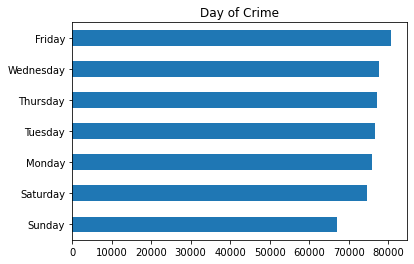

In [38]:
crime_in_day = DateTime_df.Day.value_counts().sort_values().plot(title = 'Day of Crime',kind= "barh")
fig_DateTime_df = crime_in_day.get_figure()
fig_DateTime_df.savefig("Day of Crime.png")

Fridays seem to crime most likely happened.

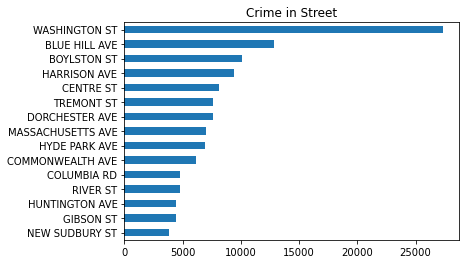

In [39]:
street_of_crime = Loc_df.Street.value_counts().iloc[:15].sort_values().plot(title = 'Crime in Street', kind= "barh")
fig_Loc_df = street_of_crime.get_figure()
fig_Loc_df.savefig("Crime in Street.png")

Washington St. happens much more crimes than other street.

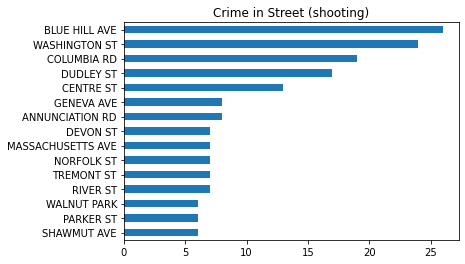

In [40]:
crime_in_street_shoot = LocNshoot.Street.value_counts().iloc[:15].sort_values().plot(title = 'Crime in Street (shooting)', kind= "barh")
fig_crime_in_street_shoot = crime_in_street_shoot.get_figure()
fig_crime_in_street_shoot.savefig("Crime in Street (Shooting).png")

Blue Hill Ave happens shooting crime the most.

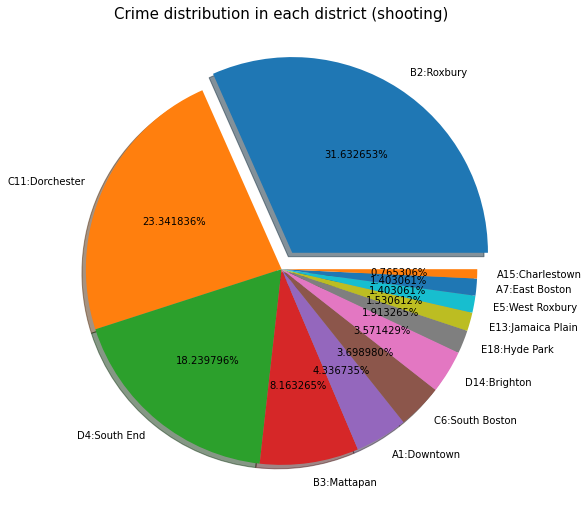

In [56]:
df_LocNshoot = LocNshoot.District.value_counts()

fraces_shooting = []
explode_shooting = []
plt.figure(figsize=(9,9))
labels =['B2:Roxbury','C11:Dorchester','D4:South End','B3:Mattapan','A1:Downtown','C6:South Boston','D14:Brighton','E18:Hyde Park','E13:Jamaica Plain','E5:West Roxbury','A7:East Boston','A15:Charlestown']
for i in df_LocNshoot:
    fraces_shooting.append(i)
    explode_shooting.append(0)

explode_shooting[0] = 0.1
plt.axes(aspect = 1)
plt.title("Crime distribution in each district (shooting)",fontsize=15)

plt.pie(x = fraces_shooting,labels= labels,autopct='%0f%%',explode= explode_shooting,shadow=True)

plt.savefig('Crime distribution in each district (shooting).png')

plt.show()

Percentage of shooting happens in each district. B2(Roxbury) got the most.

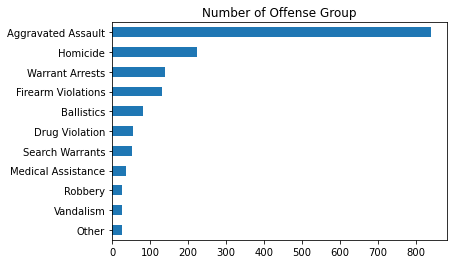

In [57]:
#df2.groupby("OffenseGroup").size().plot(kind = "bar")
OffenseGroup_Descript_df = Descript_df.OffenseGroup.value_counts().iloc[:11].sort_values().plot(title = 'Number of Offense Group',kind= "barh")
fig_OffenseGroup_Descript_df = OffenseGroup_Descript_df.get_figure()
fig_OffenseGroup_Descript_df.savefig("Offense Group.png")

The biggest number of offense group is aggravated assault. It is much more than the others.

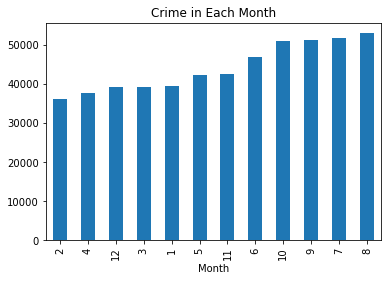

In [58]:
# df1.index = pd.CategoricalIndex(df1.index, 
#                                categories=['1','2','3','4','5','6','7','8','9','10','11','12'])
categories=['1','2','3','4','5','6','7','8','9','10','11','12']
df1_month = DateTime_df.groupby("Month").size().sort_values().plot(title = 'Crime in Each Month', kind = "bar",tick_label=categories)
fig_df1_month = df1_month.get_figure()
fig_df1_month.savefig("Crime in Each Month.png")
#'1','2','3','4','5','6','7','8','9','10','11','12'

In autumn and late summer crime easily happened.

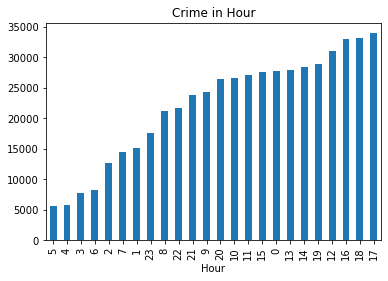

In [40]:
hour_DateTime_df = DateTime_df.groupby("Hour").size().sort_values().plot(title = 'Crime in Hour', kind = "bar")
fig_hour_DateTime_df = hour_DateTime_df.get_figure()
fig_hour_DateTime_df.savefig("Crime in Hour.png")

Crime easily happened before night.